# Automobile Price Prediction 

### Workflow:
<ul>
    <li> Loading data </li>
    <li> Preprocessing data </li>
    <li> Exploring individual variables </li>
    <li> Multivariate analysis </li>
    <li> Modelling: Linear Regression </li>
    <li> Evaluate and refine model predictions </li>
</ul>

#### Imports

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

# set the default style 
plt.style.use('ggplot')
blue= '#00688B'

# set default figure size
plt.rcParams['figure.figsize'] = (10, 8)

## 0. Loading data

In [2]:
df= pd.read_csv('autos.csv', encoding='latin-1')
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## 1. Preprocessing data 
#### 1.1 Data Translation 
The dataset we'll be working with is in German, and we'll need to convert the columns and values to English, which appears to be possible with Google Translate. Our approach would be so straightforward that it could be expressed in the following steps:

<ol>
    <li> Looking at the unique values of a column, identify its English translation </li>
    <li> Substitute German text with English text </li>
</ol>

That is how we interpret our *categorical columns*.

In [3]:
# OfferType 
print(df.offerType.unique())
df.offerType.replace({'Angebot': 'offer', 'Gesuch': 'request'}, inplace= True)
print(df.offerType.unique())

# vehicleType
print(df.vehicleType.unique())
df.vehicleType.replace({'kleinwagen': 'small car', 'kombi': 'estate',
                        'cabrio': 'convertible','andere': 'other' }, inplace= True)

# gearbox
print(df.gearbox.unique())
df.gearbox.replace({'manuell': 'manual', 'automatik': 'automatic'}, inplace= True)

# fuel type
print(df.fuelType.unique())
df.fuelType.replace({'benzin': 'petrol', 'elektro': 'electric', 'andere': 'other'}, inplace= True)

# Seller
print(df.seller.unique())
df.seller.replace({'privat': 'private', 'gewerblich': 'commercial'}, inplace= True)

# notRepairedDamage
print(df.notRepairedDamage.unique())
df.notRepairedDamage.replace({'nein':'no', 'ja': 'yes'}, inplace= True)

# brand
print(df.brand.unique())
df.brand.replace({'sonstige_autos': 'other'}, inplace= True) 

# Car model 
print(df.model.unique())
df.model.replace({'andere': 'other'}, inplace= True)

['Angebot' 'Gesuch']
['offer' 'request']
['bus' 'limousine' 'kleinwagen' 'kombi' nan 'coupe' 'suv' 'cabrio'
 'andere']
['manuell' 'automatik' nan]
['lpg' 'benzin' 'diesel' nan 'cng' 'hybrid' 'elektro' 'andere']
['privat' 'gewerblich']
['nein' nan 'ja']
['peugeot' 'bmw' 'volkswagen' 'smart' 'ford' 'chrysler' 'seat' 'renault'
 'mercedes_benz' 'audi' 'sonstige_autos' 'opel' 'mazda' 'porsche' 'mini'
 'toyota' 'dacia' 'nissan' 'jeep' 'saab' 'volvo' 'mitsubishi' 'jaguar'
 'fiat' 'skoda' 'subaru' 'kia' 'citroen' 'chevrolet' 'hyundai' 'honda'
 'daewoo' 'suzuki' 'trabant' 'land_rover' 'alfa_romeo' 'lada' 'rover'
 'daihatsu' 'lancia']
['andere' '7er' 'golf' 'fortwo' 'focus' 'voyager' 'arosa' 'megane' nan
 'a3' 'clio' 'vectra' 'scirocco' '3er' 'a4' '911' 'cooper' '5er' 'polo'
 'e_klasse' '2_reihe' 'c_klasse' 'corsa' 'mondeo' 'altea' 'a1' 'twingo'
 'a_klasse' 'cl' '3_reihe' 's_klasse' 'sandero' 'passat' 'primera'
 'fiesta' 'wrangler' 'clubman' 'a6' 'transporter' 'astra' 'v40' 'ibiza'
 'micra' '1er

#### 1.2 Data Cleaning 
At this step, we will split columns and maintain only the useful parts, drop some columns, and change the data type for others.

In [4]:
# Price
df.price = df.price.str.replace('[\$,]', '').astype(float)

# Mileage or odometer
df.odometer = df.odometer.str.replace('km|,', '').astype(int)

# dateCrawled
df.dateCrawled= pd.to_datetime(df.dateCrawled)

C:\Users\pc\AppData\Local\Temp\ipykernel_11640\1787847211.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.price = df.price.str.replace('[\$,]', '').astype(float)
C:\Users\pc\AppData\Local\Temp\ipykernel_11640\1787847211.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df.odometer = df.odometer.str.replace('km|,', '').astype(int)


In [5]:
df.price

0         5000.0
1         8500.0
2         8990.0
3         4350.0
4         1350.0
          ...   
49995    24900.0
49996     1980.0
49997    13200.0
49998    22900.0
49999     1250.0
Name: price, Length: 50000, dtype: float64

In [6]:
df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,private,offer,5000.0,control,bus,2004,manual,158,other,150000,3,lpg,peugeot,no,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,private,offer,8500.0,control,limousine,1997,automatic,286,7er,150000,6,petrol,bmw,no,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,private,offer,8990.0,test,limousine,2009,manual,102,golf,70000,7,petrol,volkswagen,no,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,private,offer,4350.0,control,small car,2007,automatic,71,fortwo,70000,6,petrol,smart,no,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,private,offer,1350.0,test,estate,2003,manual,0,focus,150000,7,petrol,ford,no,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


## 2. Exploring individual variables
### 2.1 Price

In [7]:
df.price.describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64

When we attempt to evaluate the price column summary above, we must remember that the presence of outliers in the column may alter the summary statistics, and additional cleaning may be required. According to the summary, car prices have risen to more than 2.10[9]! Which is simply incorrect. That is why when we look into vehicles costing more over €100,000, we find patterns cuch '11111' or '999999'. That's why in ou cleannig approach we will keep cars with priceover €150,000 only if they're convertibles or SUV while dropping any car with a price over €200,000

In [8]:
# false patters 
df[df['price']>= 100000].head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
514,2016-03-17 09:53:08,Ford_Focus_Turnier_1.6_16V_Style,private,offer,999999.0,test,estate,2009,manual,101,focus,125000,4,petrol,ford,no,2016-03-17 00:00:00,0,12205,2016-04-06 07:17:35
1878,2016-03-12 16:58:37,Porsche_911_Turbo,private,offer,129000.0,control,coupe,1995,manual,408,911,125000,9,petrol,porsche,no,2016-03-12 00:00:00,0,70180,2016-04-05 04:49:19
2454,2016-03-21 22:51:29,Porsche_911_GT3,private,offer,137999.0,control,coupe,2010,manual,435,911,20000,7,petrol,porsche,no,2016-03-21 00:00:00,0,80636,2016-04-07 05:45:39
2751,2016-03-15 10:52:35,Porsche_911___993_4S,private,offer,120000.0,control,coupe,1998,manual,286,911,125000,3,petrol,porsche,no,2016-03-15 00:00:00,0,25488,2016-04-05 19:47:31
2897,2016-03-12 21:50:57,Escort_MK_1_Hundeknochen_zum_umbauen_auf_RS_2000,private,offer,11111111.0,test,limousine,1973,manual,48,escort,50000,3,petrol,ford,no,2016-03-12 00:00:00,0,94469,2016-03-12 22:45:27


In [9]:
# Resonable prices filtering 
df = df[(df['price'] <= 200000) & 
            ~((df['price'] > 100000) & 
              df['vehicleType'].isin(['limousine', 'small car', 'estate', 'bus', 'other']) )]

# Looking at cars with a price above €75000
df[df.price >= 75000].brand.unique().tolist()

['porsche',
 'land_rover',
 'renault',
 'other',
 'audi',
 'mercedes_benz',
 'bmw',
 'ford']

In an interpretation of the results we've got when filtering for cars with a price above €75K,  brands like (Ford, Renault). Let's take a clos look on this cars

In [10]:
# Examine non premium cars with a price over €75000
df[ (df['price'] > 75000) & (df['brand'].isin(['ford', 'renault']))].model

2683       other
49815    mustang
Name: model, dtype: object

There's nothing to worry about because only two automobiles emerge, both of which are either premium or offered by collectors. Nonetheless, we will set a minimum price for an automobile that is more than €100.

In [11]:
df= df.loc[df.price >= 100]

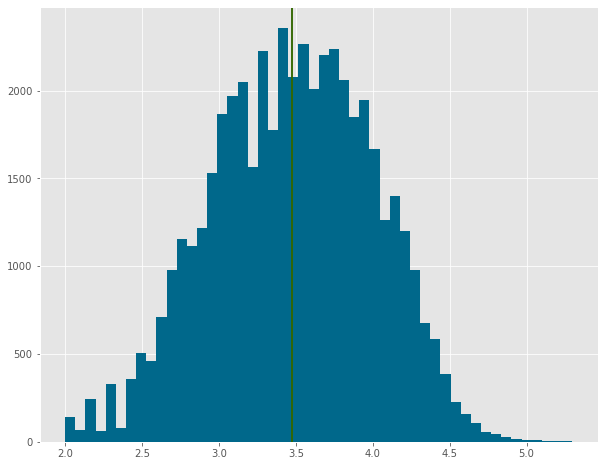

In [12]:
log_price= np.log10(df.price)
plt.hist(log_price, bins= 50, color=blue )
df['log_price']= log_price
# median and mean vertical bars 
plt.axvline(log_price.mean(), c= 'red')
plt.axvline(log_price.median(), c= 'green')
plt.show()

The red bar represents the mean, while the blue bar represents the median. The median and mean have the same value.

We have a nearly normal distribution after the scale transformation.

### 2.2 Vehicle type 

<BarContainer object of 8 artists>

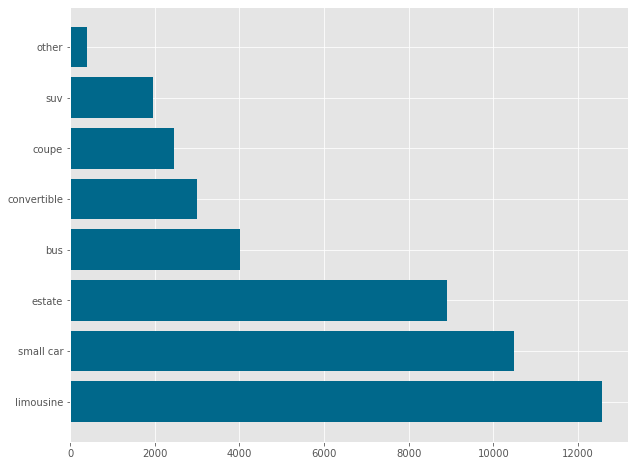

In [13]:
plt.barh(df.vehicleType.value_counts().index, df.vehicleType.value_counts().values, color= blue)

This demonstrates how the European market is oriented toward family automobiles, with a high presence of small cars.
### 2.3 Year of Registration
Looking at the statistical description of the year of registration column, you can see that the minimum year of registration is 1000 and the maximum is 9999, which is obviously incorrect. Hence, to keep it reasonable, maintain only cars registered between 1960 and 2023 (current year), even if the data's highest resonable year of registration when scraped is 2016.

In [14]:
df.yearOfRegistration.describe()

count    48216.000000
mean      2004.730504
std         87.904525
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: yearOfRegistration, dtype: float64

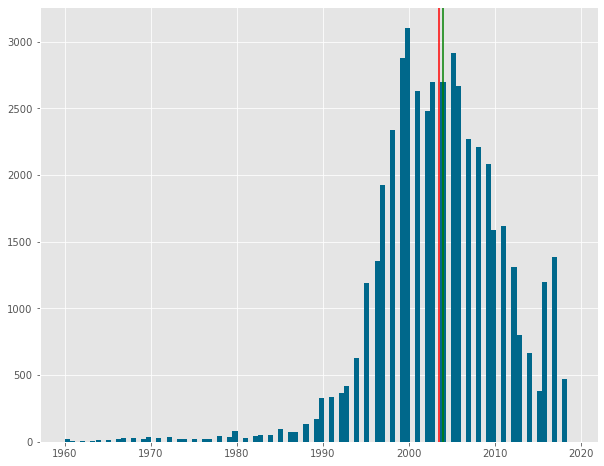

In [15]:
# Keep only cars registered between 1960 and 2023
df= df.loc[ (df.yearOfRegistration >= 1960) & (df.yearOfRegistration <= 2023)]

# Plot 
plt.hist(df.yearOfRegistration, bins= 100, color=blue)
plt.axvline(df.yearOfRegistration.mean(), c= 'red')
plt.axvline(df.yearOfRegistration.median(), c= 'green')
plt.show()

Red bar represents mean, blue bar represents median. Note that the mean and the median are identical.

The distribution is close to normal, with the following exceptions:

- A big left tail 
- Three peaks: *one in 1999-2000, one in 2005-2006, and one in 2016*.

Regarding 2016, it was a year with high car registrations in Germany, according to the German Federal Motor Transport Authority (Kraftfahrt-Bundesamt)




### 2.4 Month of Registration
In terms of nan values, the month of registration is identical to the year of registration, with exactly 0 nan values. However, there is a 4292 listing with 0 as month of regidtration, which I choose to keep it. demonstrating how eBay has made it mandatory for both registration columns to be entered when listing a car but didn't consider that 0 can't be a month of registration.

In [16]:
# Sum of NaN values 
print( 'sum of nan values', df.monthOfRegistration.isna().sum())
print('0 as a month of registration', len(df[df.monthOfRegistration==0]))

sum of nan values 0
0 as a month of registration 4292


In [17]:
# Statistical description
df.monthOfRegistration.describe()

count    48155.000000
mean         5.804963
std          3.676701
min          0.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: monthOfRegistration, dtype: float64

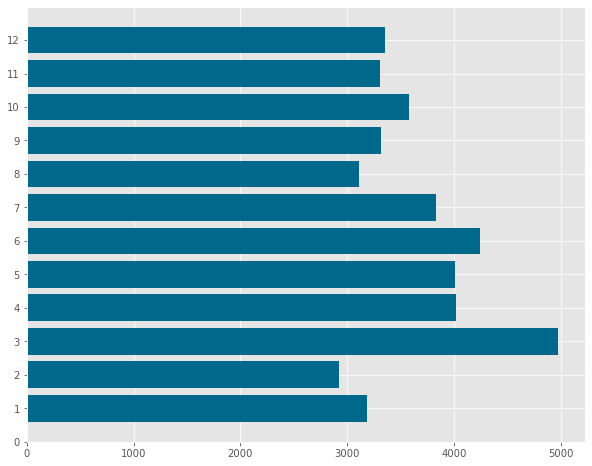

In [18]:
# Horizontal bars 
monthsOfRegisration= df[df.monthOfRegistration!=0].monthOfRegistration
plt.barh(monthsOfRegisration.value_counts().index, monthsOfRegisration.value_counts().values, color= blue)
plt.yticks(range(0, 13))

plt.show()

The months of March and June are the busiest for automobile registrations. A quick internet search confirmed that this is consistent with the seasonality of car registrations that we see in Germany (incidently, there is a similar effect in France and the UK).

### 2.5 Transmission year

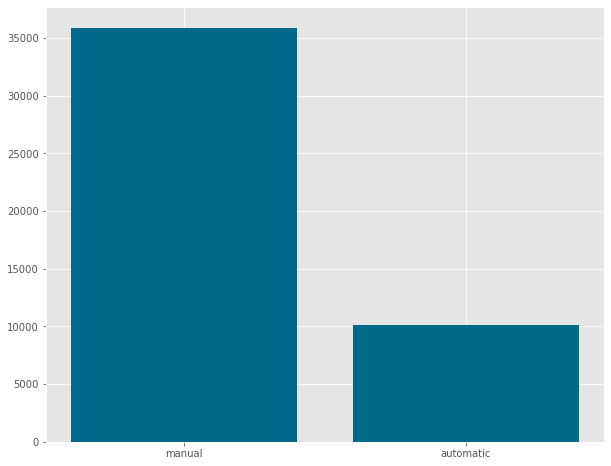

In [19]:
plt.bar(df.gearbox.value_counts().index, df.gearbox.value_counts().values, color= blue)
plt.show()

The plot shows that the European market is primarily a manual transmission market.
### 2.6 Engine Power
PS, which stands for PferdStarke (literally, 'horse strength' in German), is used to measure engine power, with 1 PS equaling 736 Watts. We can tell from the statistical description that there is some cleaning to be done. We will only keep automobiles with engines rated between 25 and 600 horsepower for the following reasons:
- A minimum of 25: There should be a higher score, maybe 70, but when we consider the background, we see that a certain model of automobile (Trabant 601) left over from the East-German Communist era is still in use. since these vehicles have a 25PS.
- Power engines in luxury automobiles may range from 250 to 500 PS, with 600 being generous.


In [20]:
df.powerPS.describe()

count    48155.000000
mean       117.652663
std        200.991127
min          0.000000
25%         74.000000
50%        107.000000
75%        150.000000
max      17700.000000
Name: powerPS, dtype: float64

In [21]:
# Keep cars which power engine ranges between 25 and 600:
df= df.loc[ (df.powerPS >= 25) & (df.powerPS <= 600)]

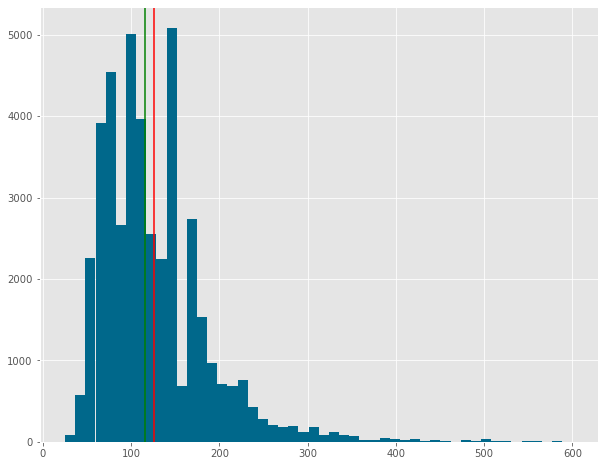

In [22]:
# plot distrubtion
plt.hist(df.powerPS, bins= 50, color=blue)
plt.axvline(df.powerPS.mean(), c= 'red')
plt.axvline(df.powerPS.median(), c= 'green')
plt.show()

Red bar indicates mean, blue bar indicates median.

The distribution is postively skewed with a long tail (that may contain errors, as we just saw).

The range of thes values is generally true in Germany as well as in other markets around the world. Engine displacement values of around 60, 100, 120, and 140 (as shown in the plot) cubic centimeters (cc) have become common "market standards" in the automotive industry. 
### 2.7 Model
We have 244 distinct models, however we will only check for the top 15 models currently on the market.

In [23]:
print('Number of unique models: ', len(df.model.unique()))

Number of unique models:  244


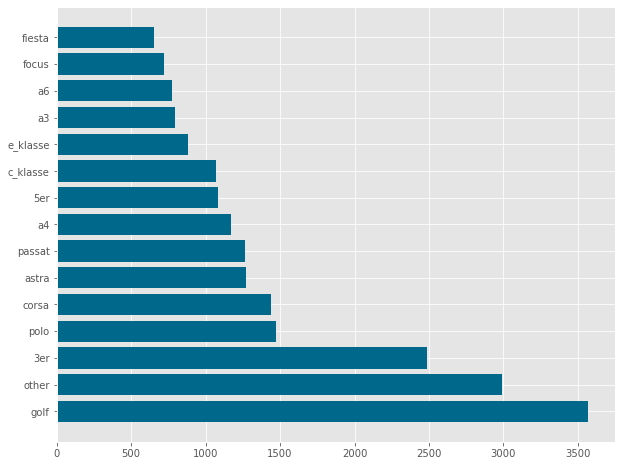

In [24]:
# Visualize the most present 15 models in the market
models_count= df.model.value_counts()[:15]
plt.barh(models_count.index, models_count.values, color= blue)
plt.show()

The Golf comes in #1, as expected, and the BMW 3 Series comes in second, making it clear that we're looking at the German market. That might also have something to do with the price of these cars (they're cheap), *to study later*. 

Another intriguing aspect is how 'other' cars (which refers to all other cars that already existed but just not selected by the website from where data was scraped).
### 2.8 Brand 
We have 40 distinct brands in our market, and we will investigate their existence in an approach similar to that of models.

In [25]:
print('Number of brands:',len(df.brand.unique()))

Number of brands: 40


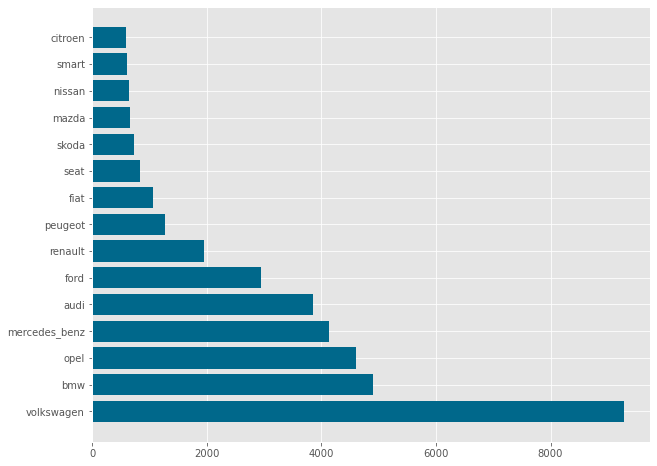

In [26]:
brands_count= df.brand.value_counts()[:15]
plt.barh(brands_count.index, brands_count.values, color= blue)
plt.show()

###### German manufacturers rule their domestic market: 
Looking at the graph above, we can see that the top six brands are German, the sixth is American, the seventh and eighth are French, Fiat is Italian, and Seat is ninth, with most of its parts manufactured in German since it belongs to the VW group even if it's Spanish.
###### Domain knowledge grouping of barnds:
With 40 distinct brands it will be hard to understand or look for associations with the price. That's why it makes sense to group brands by budget and make another categorical columns where we can cluster brands. However, it is necessary to use the price column to cluster and that will definetly result in another correlation whn there's isn't necessary one. So we'll mainly rely on domain-knowledge to classify the 40 brands into clusters. It might be subjective but still a decent way to create a categorical columns without reslting in a correlation.

In [27]:
# Define brand groups based on market perception
other = ['lada', 'trabant', 'other']
budget = ['chevrolet', 'daewoo', 'dacia']
budget_plus = ['hyundai', 'kia', 'skoda', 'daihatsu']
mid_minus = ['chrysler', 'fiat', 'ford', 'citroen', 'mitsubishi', 'opel', 'rover', 'seat', 'suzuki']
mid_range = ['nissan', 'peugeot', 'renault', 'toyota']
mid_plus = ['honda', 'mazda', 'smart', 'subaru', 'volkswagen']
premium_minus = ['alfa_romeo', 'lancia', 'saab', 'jeep', 'volvo', 'mini']
premium = ['audi', 'bmw', 'jaguar', 'land_rover', 'mercedes_benz', 'porsche']

# Create categorical column based on brand groups
df.loc[df['brand'].isin(other), 'brand_cat'] = 'other'
df.loc[df['brand'].isin(budget), 'brand_cat'] = 'budget'
df.loc[df['brand'].isin(budget_plus), 'brand_cat'] = 'budget_plus'
df.loc[df['brand'].isin(mid_minus), 'brand_cat'] = 'mid_minus'
df.loc[df['brand'].isin(mid_range), 'brand_cat'] = 'mid_range'
df.loc[df['brand'].isin(mid_plus), 'brand_cat'] = 'mid_plus'
df.loc[df['brand'].isin(premium_minus), 'brand_cat'] = 'premium_minus'
df.loc[df['brand'].isin(premium), 'brand_cat'] = 'premium'

# Set the order of the categorical levels and labels
cat_order = pd.api.types.CategoricalDtype(categories=['budget', 'budget_plus', 'mid_minus', 'mid_range', 'mid_plus', 'premium_minus', 'premium', 'other'], ordered=True)
df['brand_cat'] = df['brand_cat'].astype(cat_order)

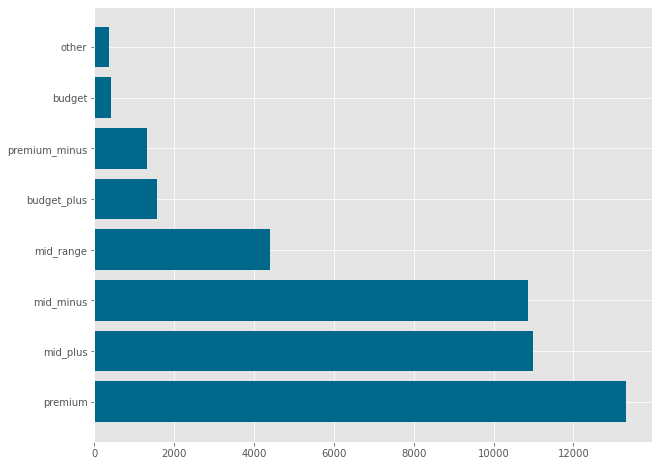

In [28]:
# horizontal histogram
brand_cats= df.brand_cat.value_counts()[:15]
plt.barh(brand_cats.index, brand_cats.values, color= blue)
plt.show()

### 2.9 Mileage or *Kilometrage*
Or odometer in our dataset.

In [29]:
df.odometer.describe()

count     43239.000000
mean     125732.324984
std       39147.114227
min        5000.000000
25%      100000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer, dtype: float64

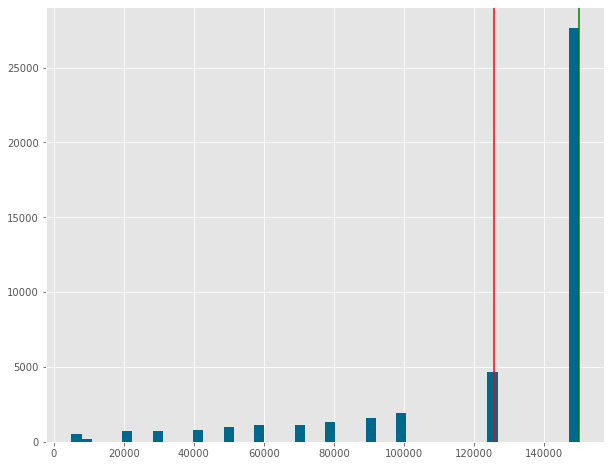

In [30]:
# plot histogram
plt.hist(df.odometer, bins= 50, color=blue)
plt.axvline(df.odometer.mean(), c= 'red')
plt.axvline(df.odometer.median(), c= 'green')
plt.show()

Red bar indicates mean, blue bar indicates median.

### 2.10 Fuel type


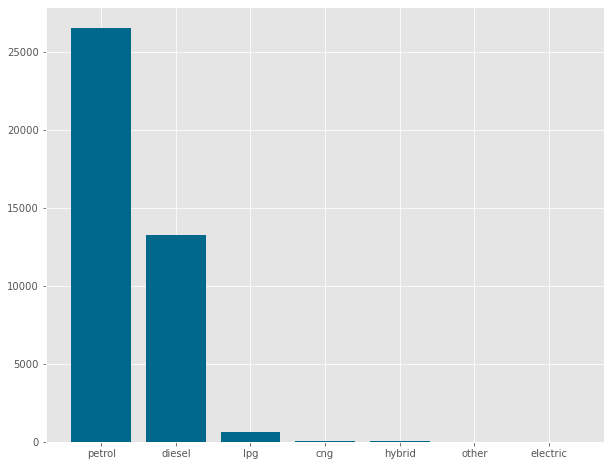

In [31]:
fuel_type_counts= df.fuelType.value_counts()
plt.bar(fuel_type_counts.index, fuel_type_counts.values, color= blue)
plt.show()

Petrol is roughly twice as prominent as Diesel.
### 2.11 Unrepaired damage


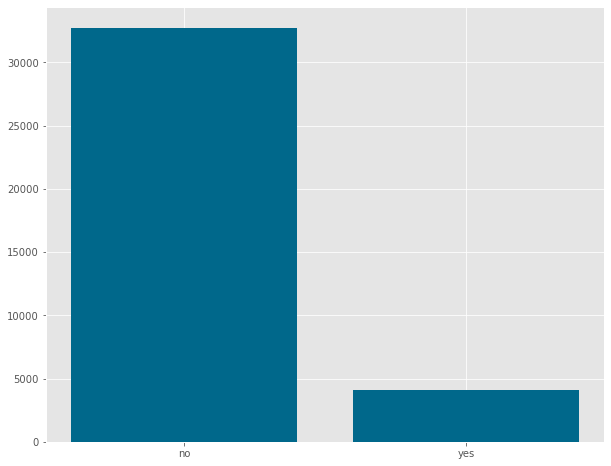

In [32]:
repair_counts= df.notRepairedDamage.value_counts()
plt.bar(repair_counts.index, repair_counts.values, color= blue)
plt.show()

## 3. Multivariate Analysis
### 3.1 Continuous Variables
For continuous variables, we can try a correlation matrix

<AxesSubplot:>

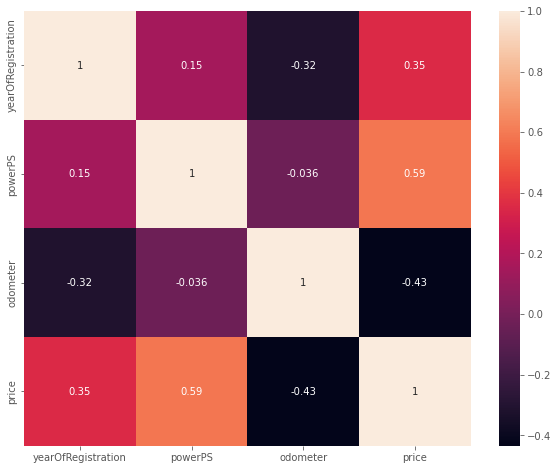

In [33]:
cols = ["yearOfRegistration", "powerPS", "odometer", "price"]
corr_matrix = df[cols].corr()
sns.heatmap(corr_matrix, annot= True)

Interpretations for each correlation coefficient related to the price:
- The correlation coefficient between *price* and *year of registration* is 0.35 indicating a weak positive correlation, which means that there's a slight tendency for a car price to increase the more the year increase.
- The correlation coefficient between *powerPS* (Engine Power) and *price* is 0.59, indicating a moderate positive correlation. It means that there is a tendency for the price of a car to increase with an increase in its engine power.
- The correlation coefficient between *odometer* (mileage) and *price* is -0.43, indicating a moderate negative correlation. It means that there is a tendency for the price of a car to decrease with an increase in its odometer, which suggests that higher mileage cars are generally less valuable.






### 3.1.1 Price vs Engine Power

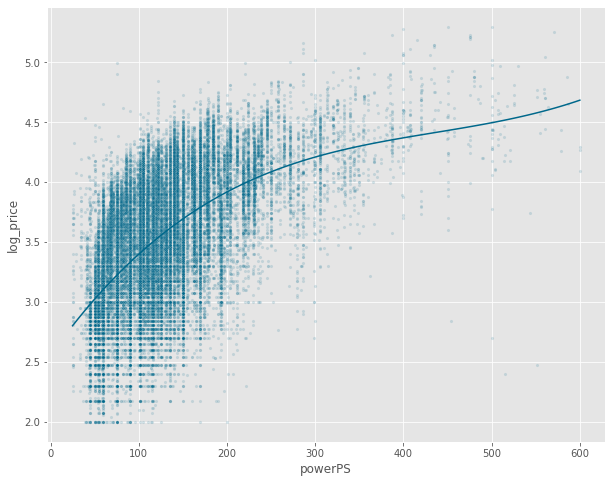

In [34]:
sns.scatterplot(x="powerPS", y="log_price", data=df, color=blue, alpha=0.15, s=10)

# Add a smoothed curve to the plot
x = df['powerPS']
y = df['log_price']
p = np.poly1d(np.polyfit(x, y, 3))
xp = np.linspace(x.min(), x.max(), 100)
plt.plot(xp, p(xp), color=blue)
plt.show()

- The plot suggests that ther's a correlation between varibales however there's a lot of non-linearity which means that the effect of powerPS on log_price isn't constant but instead changes as powerPS increases or decreses.


### 3.1.2 Price vs Engine Power vs Fuel Type
When fuel type is added to the model, the price and power connection varies for one key reason that may not be logical all of the time, but at least on the new vehicle market, which is that diesel engines are normally more expensive than petrol engines for the same amount of power output. Thus, well only be keepig diesel and petrol as fuel types.

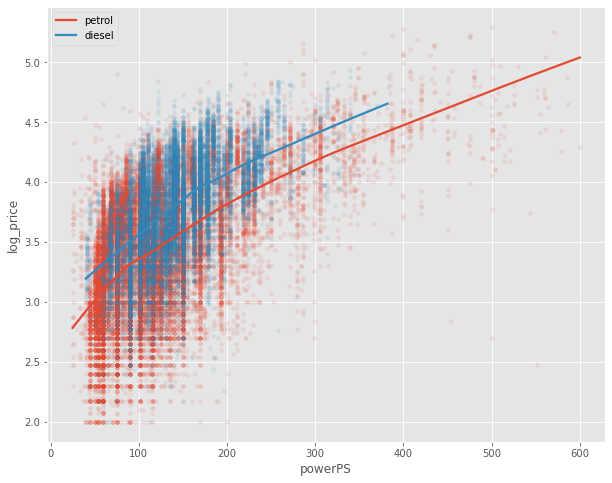

In [35]:
fuel_types = ['petrol', 'diesel']

for fuel in fuel_types:
    subset = df[df['fuelType'] == fuel]
    sns.regplot(x='powerPS', y='log_price', data=subset, lowess= True, scatter= False, label= fuel)
    plt.scatter(x=subset['powerPS'], y=subset['log_price'], s=15, alpha=0.1)
    plt.legend()

This plot indicates that diesel cars are more costly for a given power output. We may also claim that a high power output engine will most likely be fuelled by gasoline.

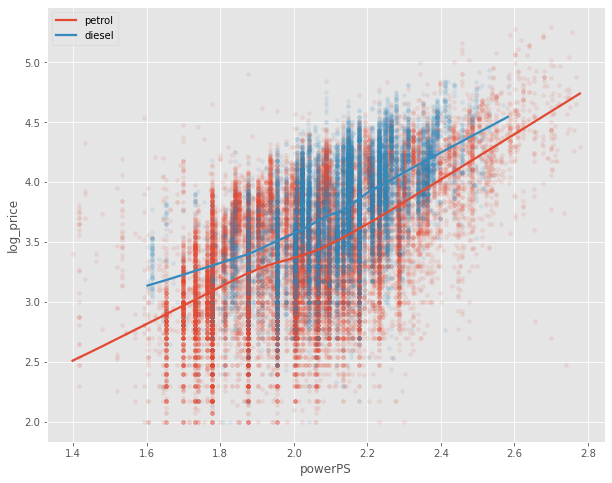

In [46]:
for fuel in fuel_types:
    subset = df[df['fuelType'] == fuel]
    sns.regplot(x=np.log10(subset['powerPS']), y=subset['log_price'], lowess= True, scatter= False, label= fuel)
    plt.scatter(x=np.log10(subset['powerPS']), y=subset['log_price'], s=15, alpha=0.1)
    plt.legend()

Even if linearity was already present in the previous plot, when we utilize the logarithm of power, it expands to the point where we consider both curves to be parallel. As a result, automobile prices are comparable when comparing diesel and gasoline vehicles.

### 3.1.3 Price vs Engine Power vs Fuel Type vs Gearbox
Let's complicate matters by investigating how these four correlates;

C:\Users\pc\AppData\Local\Temp\ipykernel_11640\2139358000.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['log_powerPS']= np.log10(subset_data['powerPS'])


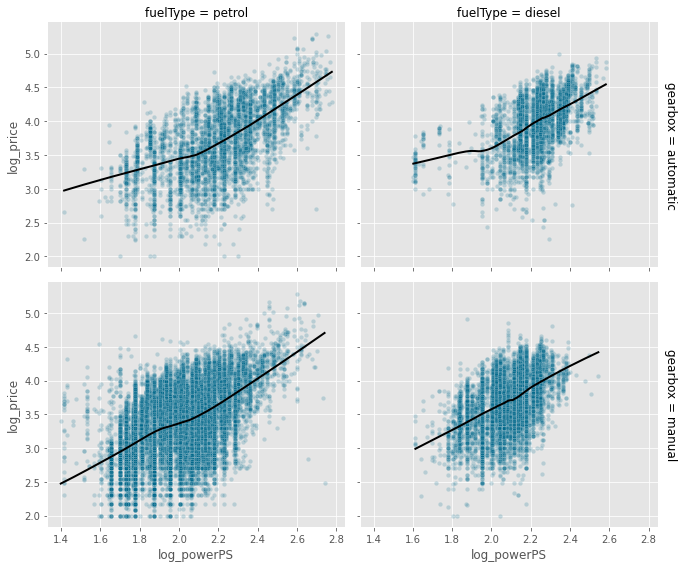

In [51]:
# Subset data
subset_data = df[(df['fuelType'].isin(['petrol', 'diesel'])) & 
                   (df['gearbox'].notna())]
subset_data['log_powerPS']= np.log10(subset_data['powerPS'])
# plot grids 2x2
g = sns.FacetGrid(data=subset_data, col='fuelType', row='gearbox', 
                  margin_titles=True, height=4, aspect=1.2)

# Mapping the scatterint and regression lines into the plots
g.map(sns.scatterplot, 'log_powerPS', 'log_price', alpha=0.2, s=20, color=blue)
g.map(sns.regplot, 'log_powerPS', 'log_price', scatter=False, color='black', lowess= True, line_kws={'lw': 2})

# show plot
plt.show()

Using the log of power, we see that petrol cars are more spread out in terms of price and power than Diesel cars. We also notice that automatic cars tend to be both more powerful and more expensive than manual.
### 3.1.4 Price vs Year of registration